# Forecast the CocaCola prices data set. Prepare a document for each model explaining 
 * how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
import warnings
warnings.filterwarnings('ignore')

In [2]:
coca=pd.read_excel('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 18 forecasting/CocaCola_Sales_Rawdata.xlsx')
coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [4]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

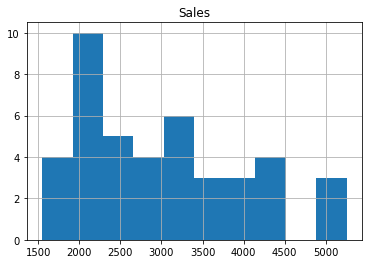

In [5]:
coca.hist()

<AxesSubplot:ylabel='Density'>

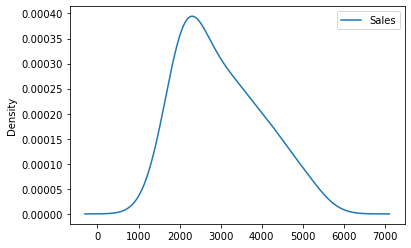

In [6]:
coca.plot(kind='kde')

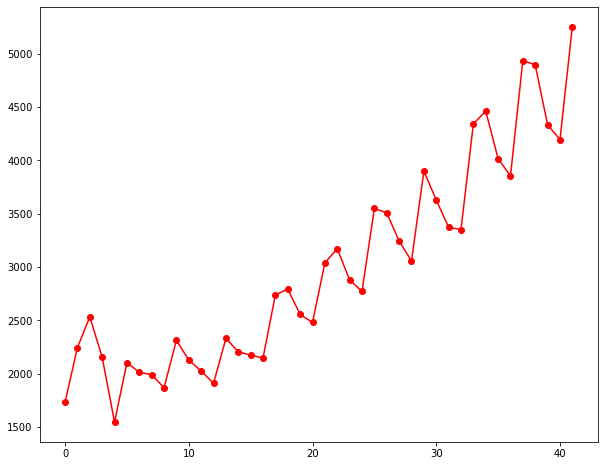

In [7]:
coca.Sales.plot(figsize=(10,8),color='red',marker='o')
plt.show()

<AxesSubplot:ylabel='Quarter'>

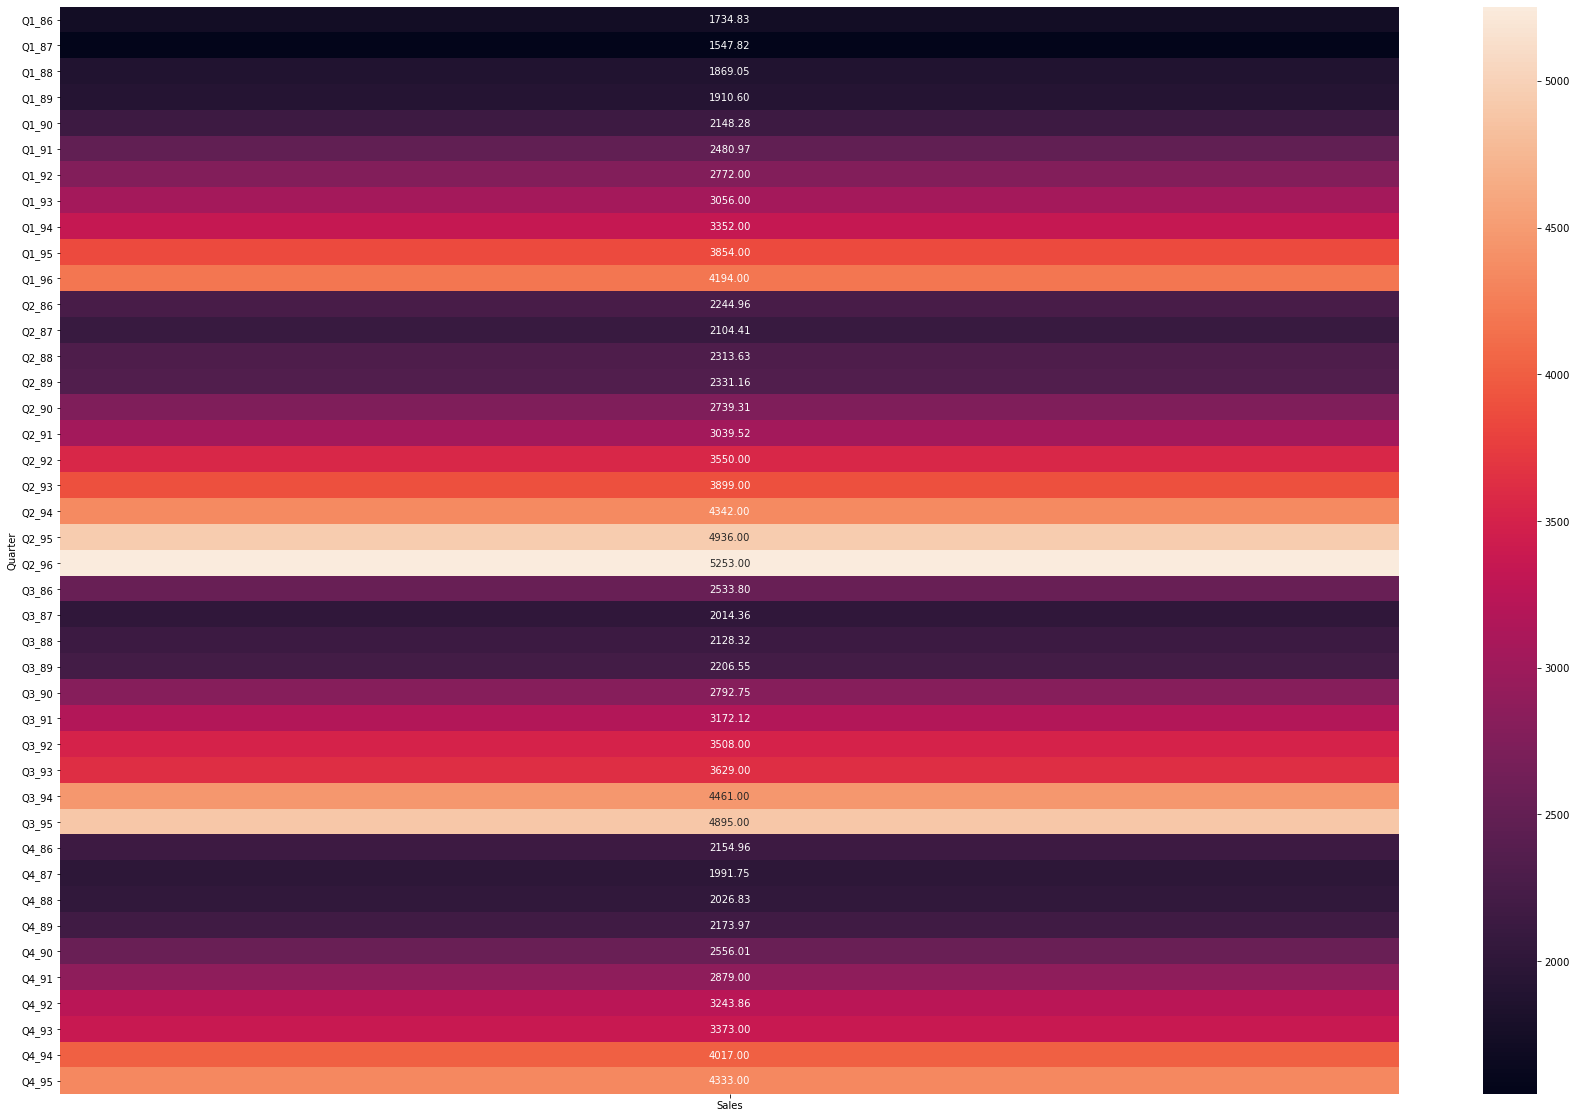

In [8]:
plt.figure(figsize=(30,20))
heatmap_c=pd.pivot_table(data=coca,values='Sales',index='Quarter',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_c,annot=True,fmt='.2f') # fmt  is format of the grid values

<AxesSubplot:xlabel='Sales'>

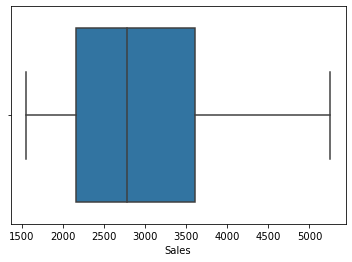

In [9]:
sns.boxplot('Sales',data=coca)

In [10]:
quarter=['Q1','Q2','Q3','Q4']
n=coca['Quarter'][0]
n[0:2]

'Q1'

In [11]:
# For data driven model
coca['quarter']=0
for i in range(42):
    n=coca['Quarter'][i]
    coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))
    coca2=pd.concat((coca,dummy),axis=1)

In [12]:
coca2.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [13]:
# for model based methods
coca['quarter']=0
for i in range(42):
    n=coca['Quarter'][i]
    coca['quarter'][i]=n[0:2]
    dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))
    cola=pd.concat((coca,dummy),axis=1)
t=np.arange(1,43)
cola['t']=t
cola['t_square']=cola['t']*cola['t']
log_Sales=np.log(cola['Sales'])
cola['log_Sales']=log_Sales

In [14]:
cola.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

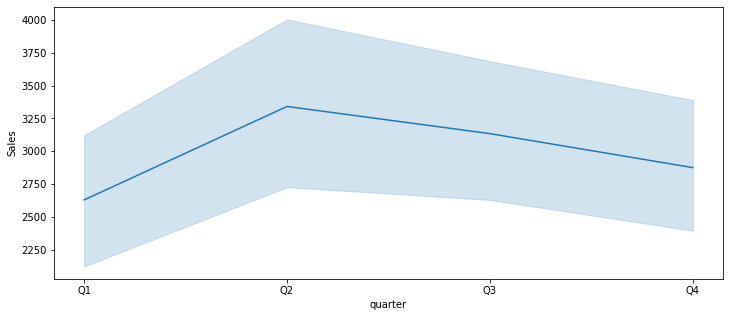

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(x='quarter',y='Sales',data=coca)

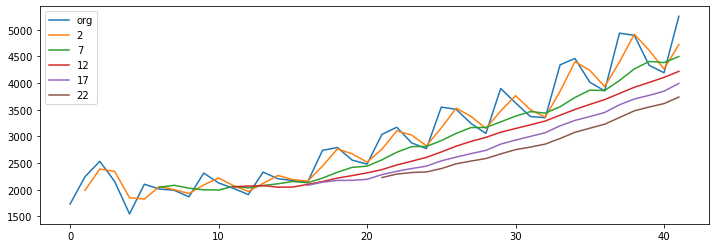

In [16]:
# moving average

plt.figure(figsize=(12,4))
coca.Sales.plot(label='org')
for i in range(2,27,5): # first starting point,ending point ,period of gap
    coca['Sales'].rolling(i).mean().plot(label=str(i)) # rolling mean is nothing but moving average smoothing.
plt.legend(loc='best')

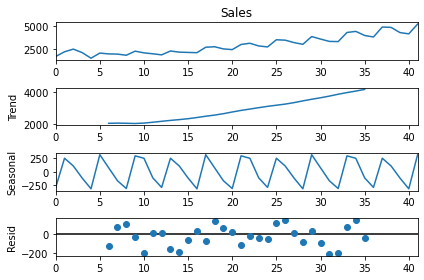

In [17]:
# Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add=seasonal_decompose(coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

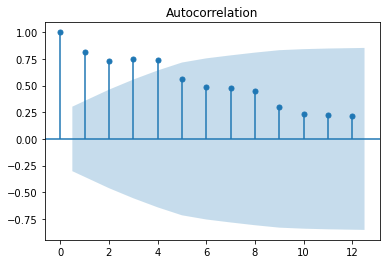

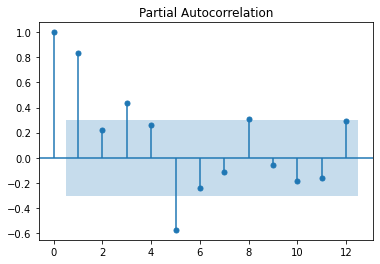

In [18]:
# ACF & PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales,lags=12)
tsa_plots.plot_pacf(coca.Sales,lags=12)
plt.show()

## Data Driven Forecasting model

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt # Holts exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
# spliting data
train=coca2.head(32)
test=coca2.tail(10)

In [21]:
# Evaluation metrics rmse
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [22]:
# Simple exponential method
ses_model=SimpleExpSmoothing(train['Sales']).fit()
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
rmse_ses_model=RMSE(test.Sales,pred_ses)
rmse_ses_model

1038.0146097085883

In [23]:
# Holt methods
hw_model=Holt(train['Sales']).fit()
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
rmse_hw_model=RMSE(test.Sales,pred_hw)
rmse_hw_model

924.9635257496326

In [24]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit()
pred_hwe_add=hwe_model_add.predict(start=test.index[0],end=test.index[-1])
rmse_model_add=RMSE(test.Sales,pred_hwe_add)
rmse_model_add

526.4615269945839

In [25]:
#Holt winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit()
pred_hwe_mul=hwe_model_mul.predict(start=test.index[0],end=test.index[-1])
rmse_model_mul=RMSE(test.Sales,pred_hwe_mul)
rmse_model_mul

587.207529421941

## Model based forecasting

In [26]:
# Spliting data
train=cola.head(32)
test=cola.tail(10)

In [27]:
train.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [28]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [29]:
# linear model
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767122

In [30]:
# Exponential
exp=smf.ols('log_Sales~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076657

In [31]:
#Quadratic
quad=smf.ols('Sales~t+t_square',data=train).fit()
pred_quad=pd.Series(quad.predict(test[['t','t_square']]))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad


457.73573554073994

In [32]:
# additive seasonality
add_sea=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_se=pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_se=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_se))**2))
rmse_add_se

1850.466546185835

In [33]:
# Additive Seasonality Quadratic
add_se_quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_se_q=pd.Series(add_se_quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_se_q=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_se_q))**2))
rmse_add_se_q

277.35107711285127

In [34]:
# Multiplicative seasonality
mul_se=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_se=pd.Series(mul_se.predict(test))
rmse_mul_se=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_se)))**2))
rmse_mul_se

1908.2503948361125

In [35]:
# Multiplicative Additive Seasonality
mul_add_se=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_add_se=pd.Series(mul_add_se.predict(test))
rmse_mul_add_se=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_add_se)))**2))
rmse_mul_add_se

448.86781826917377

In [36]:
# compare the result
data={'MODEL':pd.Series(['Simple Exponential model','Holts methods','Hw exp smoothing add','Hw exp smoothing mul','Linear model','Exp model','Quad Model','Add Seasonality ','Add Seasonality Quad','Mult seasonality''Mult Add Seasonality']),
    'RMSE_Values':pd.Series([rmse_ses_model,rmse_hw_model,rmse_model_add,rmse_model_mul,rmse_linear,rmse_exp,rmse_quad,rmse_add_se,rmse_add_se_q,rmse_mul_se,rmse_mul_add_se])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
8,Add Seasonality Quad,277.351077
10,NaN,448.867818
6,Quad Model,457.735736
2,Hw exp smoothing add,526.461527
3,Hw exp smoothing mul,587.207529
5,Exp model,590.331643
4,Linear model,752.923393
1,Holts methods,924.963526
0,Simple Exponential model,1038.014610
7,Add Seasonality,1850.466546


In [37]:
# Building final model with least RMSE value
final_model=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=cola).fit()
pred_final=pd.Series(final_model.predict(cola[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_final_model=RMSE(cola['Sales'],pred_final)
rmse_final_model

159.05522576522472

In [38]:
pred=pd.DataFrame({'Actual':cola.Sales,'predicted':pred_final})
pred

,Actual,predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


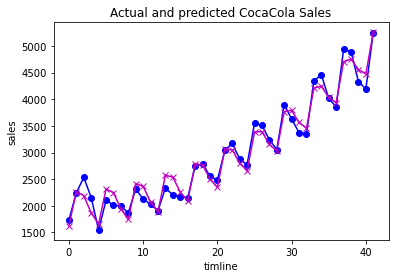

In [39]:
plt.plot(cola.Sales,marker='o',color='b', label='Actual CocaCola Sales')
plt.plot(pred_final,marker='x',color='m', label='Predicted CocaCola Sales')
plt.title('Actual and predicted CocaCola Sales')
plt.xlabel('timline')
plt.ylabel('sales')

plt.show()